# Argo one filter scale

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

In [2]:
import filt_funcs as ff
import EV_funcs as ef

## Load boxes

#### Same boxes and naming conventions as the AGU_poster notebook

In [3]:
#North Pacific
np_ds=xr.open_dataset("202206/202206_lon:(-155,-145)_lat:(30,35).nc")
np = ff.get_ds_interp(np_ds,0,2000,4)

#North Atlantic
na_ds=xr.open_dataset("202206/202206_lon:(-55,-45)_lat:(40,45).nc")
na = ff.get_ds_interp(na_ds,0,2000,4)

#Southern Ocean
so_ds=xr.open_dataset("202206/202206_lon:(30,40)_lat:(-55,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)

#Indian Ocean
io_ds=xr.open_dataset("202206/202206_lon:(90,100)_lat:(-15,-10).nc")
io = ff.get_ds_interp(io_ds,0,2000,4)

In [4]:
np_param=[-155,-145,30,35]
na_param=[-55,-45,40,45]
so_param=[30,40,-55,-50]
io_param=[90,100,-15,-10]

In [5]:
np_lon,np_lat=numpy.average((np_param[0],np_param[1])),numpy.average((np_param[2],np_param[3]))
na_lon,na_lat=numpy.average((na_param[0],na_param[1])),numpy.average((na_param[2],na_param[3]))
so_lon,so_lat=numpy.average((so_param[0],so_param[1])),numpy.average((so_param[2],so_param[3]))
io_lon,io_lat=numpy.average((io_param[0],io_param[1])),numpy.average((io_param[2],io_param[3]))

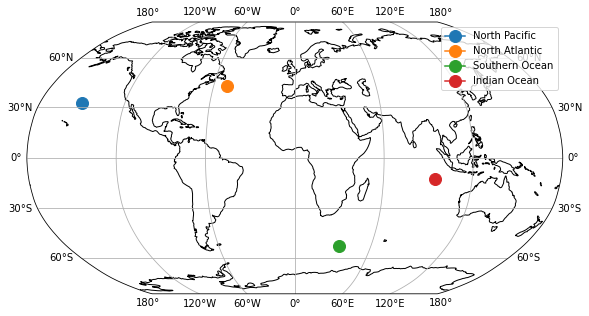

In [6]:
plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.plot(np_lon,np_lat,transform=ccrs.PlateCarree(),label='North Pacific',marker='o',markersize=12)
plt.plot(na_lon,na_lat,transform=ccrs.PlateCarree(),label='North Atlantic',marker='o',markersize=12)
plt.plot(so_lon,so_lat,transform=ccrs.PlateCarree(),label='Southern Ocean',marker='o',markersize=12)
plt.plot(io_lon,io_lat,transform=ccrs.PlateCarree(),label='Indian Ocean',marker='o',markersize=12)
plt.legend()

#### New boxes around the Soutern Ocean

In [7]:
so1_ds = xr.open_dataset("202206/202206_lon:(120,130)_lat:(-60,-55).nc")
so1 = ff.get_ds_interp(so1_ds,0,2000,4)

so2_ds = xr.open_dataset("202206/202206_lon:(-180,-170)_lat:(-60,-55).nc")
so2 = ff.get_ds_interp(so2_ds,0,2000,4)

so3_ds = xr.open_dataset("202206/202206_lon:(-120,-110)_lat:(-60,-55).nc")
so3 = ff.get_ds_interp(so3_ds,0,2000,4)

so4_ds = xr.open_dataset("202206/202206_lon:(-60,-50)_lat:(-60,-55).nc")
so4 = ff.get_ds_interp(so4_ds,0,2000,4)

so5_ds = xr.open_dataset("202206/202206_lon:(0,10)_lat:(-60,-55).nc")
so5 = ff.get_ds_interp(so5_ds,0,2000,4)

so6_ds = xr.open_dataset("202206/202206_lon:(60,70)_lat:(-60,-55).nc")
so6 = ff.get_ds_interp(so6_ds,0,2000,4)

In [8]:
so1_param = [120,130,-60,-55]
so2_param = [-180,-170,-60,-55]
so3_param = [-120,-110,-60,-55]
so4_param = [-60,-50,-60,-55]
so5_param = [0,10,-60,-55]
so6_param = [60,70,-60,-55]

In [9]:
so1_lon,so1_lat=numpy.average((so1_param[0],so1_param[1])),numpy.average((so1_param[2],so1_param[3]))
so2_lon,so2_lat=numpy.average((so2_param[0],so2_param[1])),numpy.average((so2_param[2],so2_param[3]))
so3_lon,so3_lat=numpy.average((so3_param[0],so3_param[1])),numpy.average((so3_param[2],so3_param[3]))
so4_lon,so4_lat=numpy.average((so4_param[0],so4_param[1])),numpy.average((so4_param[2],so4_param[3]))
so5_lon,so5_lat=numpy.average((so5_param[0],so5_param[1])),numpy.average((so5_param[2],so5_param[3]))
so6_lon,so6_lat=numpy.average((so6_param[0],so6_param[1])),numpy.average((so6_param[2],so6_param[3]))

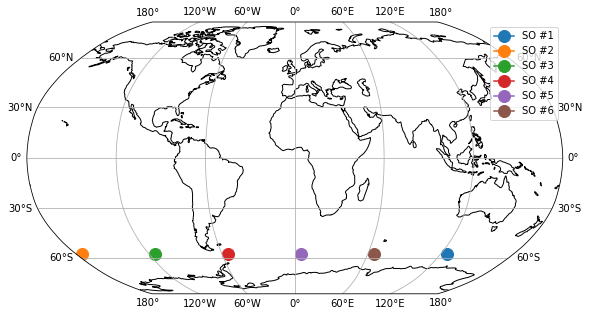

In [10]:
plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.plot(so1_lon,so1_lat,transform=ccrs.PlateCarree(),label='SO #1',marker='o',markersize=12)
plt.plot(so2_lon,so2_lat,transform=ccrs.PlateCarree(),label='SO #2',marker='o',markersize=12)
plt.plot(so3_lon,so3_lat,transform=ccrs.PlateCarree(),label='SO #3',marker='o',markersize=12)
plt.plot(so4_lon,so4_lat,transform=ccrs.PlateCarree(),label='SO #4',marker='o',markersize=12)
plt.plot(so5_lon,so5_lat,transform=ccrs.PlateCarree(),label='SO #5',marker='o',markersize=12)
plt.plot(so6_lon,so6_lat,transform=ccrs.PlateCarree(),label='SO #6',marker='o',markersize=12)
plt.legend()

## MKE/EKE method from Steinberg paper

These eqations are for energy at one spatial scale, where the eddy kinetic energy at scales smaller than the filter scale (EKE) and mean kinetic energy at scales larger than the filter scale (MKE) are:

$$
MKE = <u>^2
$$
$$
EKE = <u^2> - <u>^2
$$

(based on this paper: [Steinberg](https://journals.ametsoc.org/view/journals/phoc/52/8/JPO-D-21-0269.1.xml))

## Temperature

#### Same boxes and naming conventions as the AGU_poster notebook

In [11]:
np_CT_EV = ef.get_eddy_variance(np, 100)
na_CT_EV = ef.get_eddy_variance(na, 100)
so_CT_EV = ef.get_eddy_variance(so, 100)
io_CT_EV = ef.get_eddy_variance(io, 100)

In [12]:
np_SA_EV = ef.get_eddy_variance(np, 100, variable='SA')
na_SA_EV = ef.get_eddy_variance(na, 100, variable='SA')
so_SA_EV = ef.get_eddy_variance(so, 100, variable='SA')
io_SA_EV = ef.get_eddy_variance(io, 100, variable='SA')

In [13]:
np_SIG0_EV = ef.get_eddy_variance(np, 100, variable='SIG0')
na_SIG0_EV = ef.get_eddy_variance(na, 100, variable='SIG0')
so_SIG0_EV = ef.get_eddy_variance(so, 100, variable='SIG0')
io_SIG0_EV = ef.get_eddy_variance(io, 100, variable='SIG0')

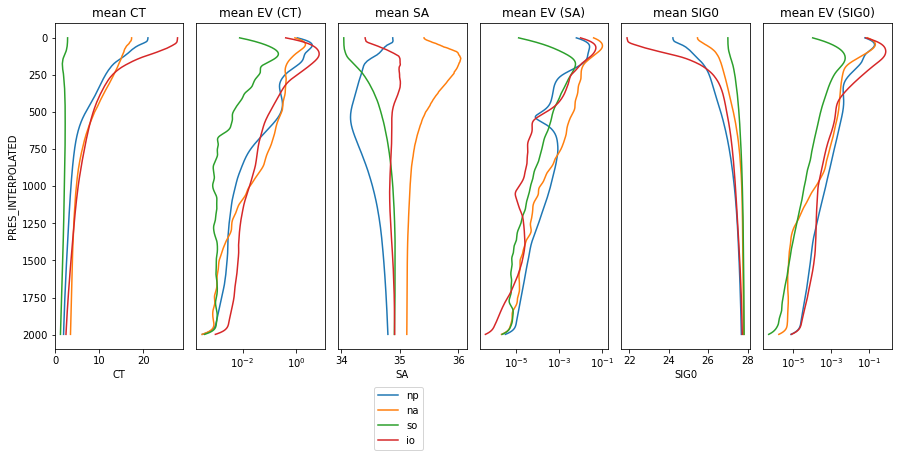

In [19]:
plt.figure(figsize=(15,6))

plt.subplot(1,6,1)
np.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='np')
na.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='na')
so.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='so')
io.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='io')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,6,2)
np_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='np')
na_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='na')
so_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so')
io_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='io')
plt.gca().invert_yaxis()
plt.title('mean EV (CT)')
plt.yticks([])
plt.ylabel('')
plt.xscale('log')

plt.subplot(1,6,3)
np.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='np')
na.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='na')
so.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='so')
io.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label ='io')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean SA')
plt.legend(bbox_to_anchor=(0.7, -0.1))

plt.subplot(1,6,4)
np_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='np')
na_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='na')
so_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so')
io_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='io')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean EV (SA)')
plt.xscale('log')

plt.subplot(1,6,5)
np.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='np')
na.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='na')
so.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so')
io.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='io')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean SIG0')

plt.subplot(1,6,6)
np_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='np')
na_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='na')
so_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so')
io_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='io')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.yticks([])
plt.ylabel('')
plt.title('mean EV (SIG0)')

plt.subplots_adjust(wspace=0.1)

In [84]:
def normalized_EV_plot(ds,ds_EV,label,roll=5):

    drho_dz = ds.SIG0.rolling(PRES_INTERPOLATED=roll).mean().rolling(PRES_INTERPOLATED=roll).mean().diff('PRES_INTERPOLATED')/2

    ((ds_EV/drho_dz**2)**(1/2)).mean('N_PROF').rolling(PRES_INTERPOLATED=roll).mean().rolling(PRES_INTERPOLATED=roll).mean().plot(y='PRES_INTERPOLATED',label=label)
    plt.xscale('log')

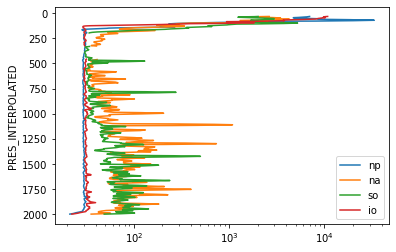

In [85]:
normalized_EV_plot(np,np_SIG0_EV,'np')
normalized_EV_plot(na,na_SIG0_EV,'na')
normalized_EV_plot(so,so_SIG0_EV,'so')
normalized_EV_plot(io,io_SIG0_EV,'io')
plt.gca().invert_yaxis()
plt.legend()
#plt.xlim(7e2,5e3)

In [79]:
normalized_EV_plot(so1,so1_SIG0_EV, )
normalized_EV_plot(so2,so2_SIG0_EV)
normalized_EV_plot(so3,so3_SIG0_EV)
normalized_EV_plot(so4,so4_SIG0_EV)
normalized_EV_plot(so5,so5_SIG0_EV)
normalized_EV_plot(so6,so6_SIG0_EV)
plt.gca().invert_yaxis()

TypeError: normalized_EV_plot() missing 1 required positional argument: 'label'

#### New boxes around the Southern Ocean

In [22]:
so1_CT_EV = ef.get_eddy_variance(so1, 100)
so2_CT_EV = ef.get_eddy_variance(so2, 100)
so3_CT_EV = ef.get_eddy_variance(so3, 100)
so4_CT_EV = ef.get_eddy_variance(so4, 100)
so5_CT_EV = ef.get_eddy_variance(so5, 100)
so6_CT_EV = ef.get_eddy_variance(so6, 100)

In [23]:
so1_SA_EV = ef.get_eddy_variance(so1, 100, variable='SA')
so2_SA_EV = ef.get_eddy_variance(so2, 100, variable='SA')
so3_SA_EV = ef.get_eddy_variance(so3, 100, variable='SA')
so4_SA_EV = ef.get_eddy_variance(so4, 100, variable='SA')
so5_SA_EV = ef.get_eddy_variance(so5, 100, variable='SA')
so6_SA_EV = ef.get_eddy_variance(so6, 100, variable='SA')

In [24]:
so1_SIG0_EV = ef.get_eddy_variance(so1, 100, variable='SIG0')
so2_SIG0_EV = ef.get_eddy_variance(so2, 100, variable='SIG0')
so3_SIG0_EV = ef.get_eddy_variance(so3, 100, variable='SIG0')
so4_SIG0_EV = ef.get_eddy_variance(so4, 100, variable='SIG0')
so5_SIG0_EV = ef.get_eddy_variance(so5, 100, variable='SIG0')
so6_SIG0_EV = ef.get_eddy_variance(so6, 100, variable='SIG0')

Text(0.5, 1.0, 'mean EV (SIG0)')

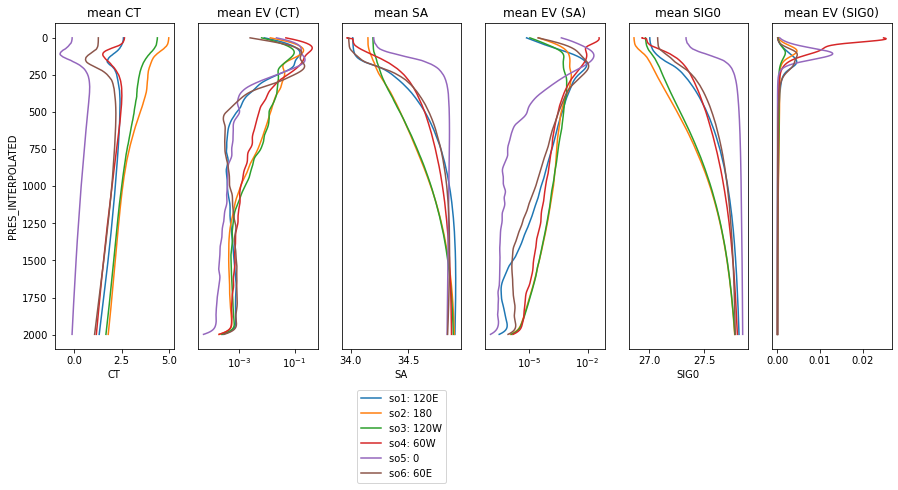

In [39]:
plt.figure(figsize=(15,6))

plt.subplot(1,6,1)
so1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so5.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so6.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('mean CT')

plt.subplot(1,6,2)
so1_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so5_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so6_CT_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean EV (CT)')
plt.xscale('log')

plt.subplot(1,6,3)
so1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so1: 120E')
so2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so2: 180')
so3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so3: 120W')
so4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so4: 60W')
so5.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so5: 0')
so6.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='so6: 60E')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean SA')
plt.legend(bbox_to_anchor=(0.5, -0.425), loc=8)

plt.subplot(1,6,4)
so1_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so5_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so6_SA_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean EV (SA)')
plt.xscale('log')

plt.subplot(1,6,5)
so1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so5.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so6.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean SIG0')

plt.subplot(1,6,6)
so1_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so2_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so3_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so4_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so5_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
so6_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.yticks([])
plt.ylabel('')
plt.title('mean EV (SIG0)')